In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

* Pandas has two important data strucures **Series** and **DataFrame**

### Series

**Series** is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.)

```python
>>> s = pd.Series(data, index=index)
```

<img src="fig_pd_series.png" alt="Pandas Series Example" height="250" width="250" align = "left">

In [2]:
person_height_ft = pd.Series([5.5,5.2,5.8,6.1,4.8],name='height',
                index = ['person_a','person_b','person_c','person_d','person_e'],dtype=np.float64)
person_height_ft

person_a    5.5
person_b    5.2
person_c    5.8
person_d    6.1
person_e    4.8
Name: height, dtype: float64

In [4]:
person_height_ft.values

array([ 5.5,  5.2,  5.8,  6.1,  4.8])

In [5]:
person_height_ft.index

Index(['person_a', 'person_b', 'person_c', 'person_d', 'person_e'], dtype='object')

* A Series is like a fixed-size dict in that you can get and set values by index label

In [6]:
person_height_ft['person_c']

5.7999999999999998

* You can also use the index position to get and set the values

In [7]:
person_height_ft[3]

6.0999999999999996

In [8]:
person_height_ft[0:3]

person_a    5.5
person_b    5.2
person_c    5.8
Name: height, dtype: float64

####  Vectorized operations and label alignment with Series

In [9]:
person_height_mtr = (12* 2.54) * person_height_ft/100
person_height_mtr

person_a    1.67640
person_b    1.58496
person_c    1.76784
person_d    1.85928
person_e    1.46304
Name: height, dtype: float64

In [10]:
# please note the index which is not same as height
person_weight_kg = pd.Series([70,55,73,68,66],name='weight',
                index = ['person_b','person_d','person_e','person_c','person_a'],dtype=np.float64)
person_weight_kg

person_b    70.0
person_d    55.0
person_e    73.0
person_c    68.0
person_a    66.0
Name: weight, dtype: float64

In [11]:
#Let's calculate BMI
bmi = person_weight_kg/person_height_mtr**2
bmi

person_a    23.484895
person_b    27.865153
person_c    21.758202
person_d    15.910107
person_e    34.104404
dtype: float64

In [12]:
#BMI of person_c
68/(1.76784*1.76784)

21.75820179358683

### DataFrame

* DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects. It is generally the most commonly used pandas object. 

<img src="fig_pd_data_frame.png" alt="Pandas DataFrame Example" height="400" width="400" align = "left">

In [13]:
index = ['person_a','person_b','person_c','person_d','person_e']
df_person = pd.DataFrame({'height':[5.5,5.2,5.8,6.1,4.8],'weight':[66,70,68,55,73],
                   'gender':['male','male','female','male','female']}, index=index)

In [14]:
df_person.describe(include='all')

,gender,height,weight
count,5,5.000000,5.0000
unique,2,NaN,NaN
top,male,NaN,NaN
freq,3,NaN,NaN
mean,NaN,5.480000,66.4000
std,NaN,0.506952,6.8775
min,NaN,4.800000,55.0000
25%,NaN,5.200000,66.0000
50%,NaN,5.500000,68.0000
75%,NaN,5.800000,70.0000


In [14]:
print(df_person.ndim)
print(df_person.shape)
print(df_person.dtypes)
print(df_person.columns)
print(df_person.index)
print(len(df_person))

2
(5, 3)
gender     object
height    float64
weight      int64
dtype: object
Index(['gender', 'height', 'weight'], dtype='object')
Index(['person_a', 'person_b', 'person_c', 'person_d', 'person_e'], dtype='object')
5


In [15]:
df_person.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, person_a to person_e
Data columns (total 3 columns):
gender    5 non-null object
height    5 non-null float64
weight    5 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 160.0+ bytes


In [16]:
df_person.reset_index()

,index,gender,height,weight
0,person_a,male,5.5,66
1,person_b,male,5.2,70
2,person_c,female,5.8,68
3,person_d,male,6.1,55
4,person_e,female,4.8,73


In [17]:
df_person.reset_index().set_index('gender')

,index,height,weight
gender,,,
male,person_a,5.5,66
male,person_b,5.2,70
female,person_c,5.8,68
male,person_d,6.1,55
female,person_e,4.8,73


In [18]:
another_index = ['a','b','c','d','e']
df1 = df_person.reset_index()
df1.index = another_index
df1

,index,gender,height,weight
a,person_a,male,5.5,66
b,person_b,male,5.2,70
c,person_c,female,5.8,68
d,person_d,male,6.1,55
e,person_e,female,4.8,73


### Accessing Data

In [16]:
# Accessing the column data
height = df_person['height']
height

person_a    5.5
person_b    5.2
person_c    5.8
person_d    6.1
person_e    4.8
Name: height, dtype: float64

In [17]:
type(height)

pandas.core.series.Series

In [18]:
df_person.columns

Index(['gender', 'height', 'weight'], dtype='object')

In [19]:
# Accessing multiple columns
df_person[['height','weight']]#array of columns

,height,weight
person_a,5.5,66
person_b,5.2,70
person_c,5.8,68
person_d,6.1,55
person_e,4.8,73


In [20]:
# Accessinng one individual cell
df_person['height']['person_a']

5.5

In [21]:
# Accessing rows by index keys
df_person.loc['person_a']

gender    male
height     5.5
weight      66
Name: person_a, dtype: object

In [22]:
# Accessing multiple rows using range
df_person['person_a':'person_c']

,gender,height,weight
person_a,male,5.5,66
person_b,male,5.2,70
person_c,female,5.8,68


In [23]:
# Accessing using index position
print(df_person.iloc[0])
print("--------------")
print(df_person.iloc[0,2])

gender    male
height     5.5
weight      66
Name: person_a, dtype: object
--------------
66


In [24]:
# Boolean indexinng
# all persons with height > 5.2 feet
df_person[(df_person.height>5.2)]#if no [] then boolean

,gender,height,weight
person_a,male,5.5,66
person_c,female,5.8,68
person_d,male,6.1,55


In [25]:
# Boolean indexinng
# all persons with height > 5.2 feet and weight > 60kgs
df_person[(df_person.height > 5.2) & (df_person.weight > 60)]

,gender,height,weight
person_a,male,5.5,66
person_c,female,5.8,68


In [26]:
df_person

,gender,height,weight
person_a,male,5.5,66
person_b,male,5.2,70
person_c,female,5.8,68
person_d,male,6.1,55
person_e,female,4.8,73


In [27]:
# Let's add new column "age" to the DataFrame
df_person['age'] = pd.Series([30,28,26,19,42], index=index)

In [28]:
df_person

,gender,height,weight,age
person_a,male,5.5,66,30
person_b,male,5.2,70,28
person_c,female,5.8,68,26
person_d,male,6.1,55,19
person_e,female,4.8,73,42


In [ ]:
# Find all perons with age > 28

In [32]:
df_person[(df_person.age>28)]

,gender,height,weight,age
person_a,male,5.5,66,30
person_e,female,4.8,73,42


In [ ]:
# Find females with age > 28

In [34]:
df_person[(df_person.age>28)&(df_person.gender=='female')]

,gender,height,weight,age
person_e,female,4.8,73,42


In [35]:
# Find max aged person
df_person[df_person.age==df_person.age.max()]

,gender,height,weight,age
person_e,female,4.8,73,42


In [ ]:
# Find max aged male person

In [42]:
df1=df_person[df_person.gender=='male']
df1[df1.age==df1.age.max()]

,gender,height,weight,age
person_a,male,5.5,66,30


In [41]:
# Find all persons having height > average height of the group

In [45]:
df_person[df_person.height > df_person.height.mean()]

,gender,height,weight,age
person_a,male,5.5,66,30
person_c,female,5.8,68,26
person_d,male,6.1,55,19


### Handling missing values

In [46]:
df_backup = df_person.copy()

In [47]:
df_person = df_backup.copy()

In [48]:
# Let's introduce few NaN values 
df_person.loc['person_a','age'] = np.NaN
df_person.iloc[2,2] = np.NaN
df_person.loc['person_e','height'] = np.NaN
df_person.loc['person_f'] = np.NaN
df_person['married'] = np.NaN

In [49]:
df_person

,gender,height,weight,age,married
person_a,male,5.5,66.0,NaN,NaN
person_b,male,5.2,70.0,28.0,NaN
person_c,female,5.8,NaN,26.0,NaN
person_d,male,6.1,55.0,19.0,NaN
person_e,female,NaN,73.0,42.0,NaN
person_f,NaN,NaN,NaN,NaN,NaN


In [50]:
# how takes 'all' or 'any'
# dropping all of the rows if all of the values are np.NaN
df_person.dropna(how='all')

,gender,height,weight,age,married
person_a,male,5.5,66.0,NaN,NaN
person_b,male,5.2,70.0,28.0,NaN
person_c,female,5.8,NaN,26.0,NaN
person_d,male,6.1,55.0,19.0,NaN
person_e,female,NaN,73.0,42.0,NaN


In [51]:
# how takes 'all' or 'any'
# dropping all of the columns if all of the values are np.NaN
df_person.dropna(axis=1,how='all')

,gender,height,weight,age
person_a,male,5.5,66.0,NaN
person_b,male,5.2,70.0,28.0
person_c,female,5.8,NaN,26.0
person_d,male,6.1,55.0,19.0
person_e,female,NaN,73.0,42.0
person_f,NaN,NaN,NaN,NaN


In [52]:
# Filling all of the NaN values with zero
df_person.fillna(0)

,gender,height,weight,age,married
person_a,male,5.5,66.0,0.0,0.0
person_b,male,5.2,70.0,28.0,0.0
person_c,female,5.8,0.0,26.0,0.0
person_d,male,6.1,55.0,19.0,0.0
person_e,female,0.0,73.0,42.0,0.0
person_f,0,0.0,0.0,0.0,0.0


In [53]:
# replace NaN weight with average weight of the group
#df_person.weight.mean()
df_person['weight'].fillna(df_person.weight.mean())

person_a    66.0
person_b    70.0
person_c    66.0
person_d    55.0
person_e    73.0
person_f    66.0
Name: weight, dtype: float64

In [54]:
df_person.fillna(method='ffill')#foreward fill

,gender,height,weight,age,married
person_a,male,5.5,66.0,NaN,NaN
person_b,male,5.2,70.0,28.0,NaN
person_c,female,5.8,70.0,26.0,NaN
person_d,male,6.1,55.0,19.0,NaN
person_e,female,6.1,73.0,42.0,NaN
person_f,female,6.1,73.0,42.0,NaN


In [55]:
df_person.fillna(method='bfill')#backward fill

,gender,height,weight,age,married
person_a,male,5.5,66.0,28.0,NaN
person_b,male,5.2,70.0,28.0,NaN
person_c,female,5.8,55.0,26.0,NaN
person_d,male,6.1,55.0,19.0,NaN
person_e,female,NaN,73.0,42.0,NaN
person_f,NaN,NaN,NaN,NaN,NaN


In [56]:
df_person[df_person['weight'].notnull()]

,gender,height,weight,age,married
person_a,male,5.5,66.0,NaN,NaN
person_b,male,5.2,70.0,28.0,NaN
person_d,male,6.1,55.0,19.0,NaN
person_e,female,NaN,73.0,42.0,NaN


In [57]:
df_person[df_person.notnull()['age']]

,gender,height,weight,age,married
person_b,male,5.2,70.0,28.0,NaN
person_c,female,5.8,NaN,26.0,NaN
person_d,male,6.1,55.0,19.0,NaN
person_e,female,NaN,73.0,42.0,NaN


In [58]:
df_person = df_person.dropna(how='all')
df_person = df_person.dropna(how='all',axis=1)
df_person

,gender,height,weight,age
person_a,male,5.5,66.0,NaN
person_b,male,5.2,70.0,28.0
person_c,female,5.8,NaN,26.0
person_d,male,6.1,55.0,19.0
person_e,female,NaN,73.0,42.0


In [59]:
df_person = df_person.fillna(method='ffill')
df_person

,gender,height,weight,age
person_a,male,5.5,66.0,NaN
person_b,male,5.2,70.0,28.0
person_c,female,5.8,70.0,26.0
person_d,male,6.1,55.0,19.0
person_e,female,6.1,73.0,42.0


In [60]:
df_person['bmi'] = df_person['weight']/(((12* 2.54) * df_person['height']/100)**2)
df_person

,gender,height,weight,age,bmi
person_a,male,5.5,66.0,NaN,23.484895
person_b,male,5.2,70.0,28.0,27.865153
person_c,female,5.8,70.0,26.0,22.398149
person_d,male,6.1,55.0,19.0,15.910107
person_e,female,6.1,73.0,42.0,21.117051


### GroupBy function

* Splitting the data into groups based on some criteria
* Applying a function to each group independently
* Combining the results into a data structure

<img src="fig_pd_groupby.jpg" alt="Pandas GroupBy" height="350" width="350" align="left">

In [29]:
df_person

,gender,height,weight,age
person_a,male,5.5,66,30
person_b,male,5.2,70,28
person_c,female,5.8,68,26
person_d,male,6.1,55,19
person_e,female,4.8,73,42


In [30]:
df_person_grp = df_person.groupby('gender')
print(type(df_person_grp))

<class 'pandas.core.groupby.DataFrameGroupBy'>


In [31]:
for group,data in df_person_grp:
    print(group, data)
    print("--------------------------------")

female           gender  height  weight  age
person_c  female     5.8      68   26
person_e  female     4.8      73   42
--------------------------------
male          gender  height  weight  age
person_a   male     5.5      66   30
person_b   male     5.2      70   28
person_d   male     6.1      55   19
--------------------------------


In [32]:
df_person_grp.mean()

,height,weight,age
gender,,,
female,5.3,70.500000,34.000000
male,5.6,63.666667,25.666667


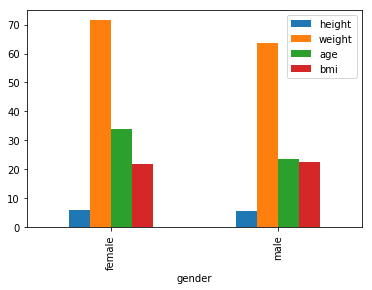

In [66]:
df_person_grp.mean().plot(kind='bar')

In [33]:
df_person_grp.max()

,height,weight,age
gender,,,
female,5.8,73,42
male,6.1,70,30


### Working with Text Data

In [67]:
df_person.apply(lambda x: x['gender'].upper()[0], axis=1)

person_a    M
person_b    M
person_c    F
person_d    M
person_e    F
dtype: object

In [68]:
df_person.columns

Index(['gender', 'height', 'weight', 'age', 'bmi'], dtype='object')

In [69]:
df_person[['weight','height']].apply(lambda x: x.dtype)

weight    float64
height    float64
dtype: object

In [70]:
df_person.mean()

height     5.740000
weight    66.800000
age       28.750000
bmi       22.155071
dtype: float64

In [71]:
df_person['gender'].str.upper().str[0]

person_a    M
person_b    M
person_c    F
person_d    M
person_e    F
Name: gender, dtype: object

In [73]:
df_person.gender.apply(lambda x: x.upper())

person_a      MALE
person_b      MALE
person_c    FEMALE
person_d      MALE
person_e    FEMALE
Name: gender, dtype: object

### Working with Dates and TimeSeries Data

In [74]:
# settig seed ?
np.random.seed(5)
price = pd.Series(np.random.randint(100,high=150,size=150),
                  index=pd.date_range('2000-1-1', periods=150, freq='B'),name='col1')

In [75]:
price.head()

2000-01-03    135
2000-01-04    114
2000-01-05    147
2000-01-06    138
2000-01-07    116
Freq: B, Name: col1, dtype: int64

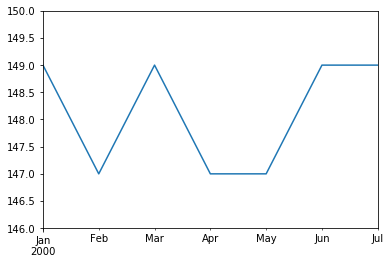

In [76]:
price.groupby(pd.TimeGrouper('1M')).max().plot(ylim=(146,150))

In [77]:
np.random.seed(5)
price1 = pd.Series(np.random.randint(200,high=250,size=500),
                   index=pd.date_range('2000-1-1', periods=500, freq='D'),name='col2')
#all_days = pd.date_range('2000-1-1', periods=500, freq='D')

In [78]:
df_time = pd.DataFrame({'col1':price,'col2':price1})

In [79]:
df_time.head()

,col1,col2
2000-01-01,NaN,235
2000-01-02,NaN,214
2000-01-03,135.0,247
2000-01-04,114.0,238
2000-01-05,147.0,216


In [80]:
len(df_time)

500

In [81]:
df_time.dtypes

col1    float64
col2      int64
dtype: object

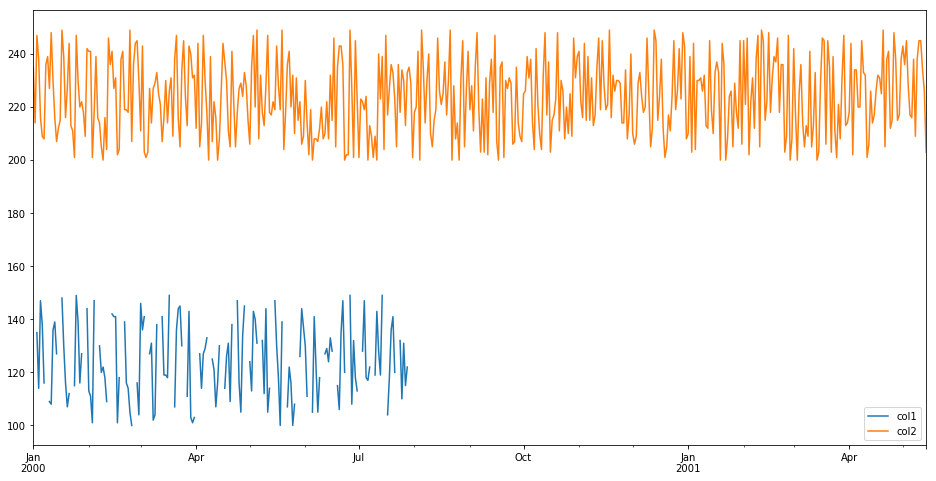

In [82]:
df_time.plot(figsize=(16,8))

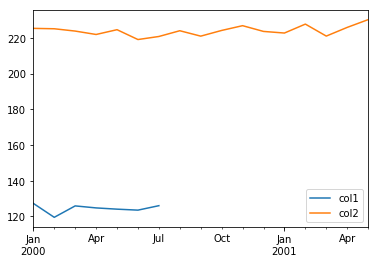

In [83]:
df_time.groupby(pd.TimeGrouper('1M')).mean().plot()

In [84]:
pd.Categorical?

In [85]:
pd.CategoricalIndex?

In [86]:
df

NameError: name 'df' is not defined

In [87]:
x = pd.Categorical(df_time['label'],ordered=True)

KeyError: 'label'

In [88]:
cat = pd.Series(df['label'], dtype=x)

NameError: name 'df' is not defined

In [ ]:
cat

In [ ]:
pd.merge?

In [ ]:
pd.concat?

In [ ]:
pd.Timestamp?

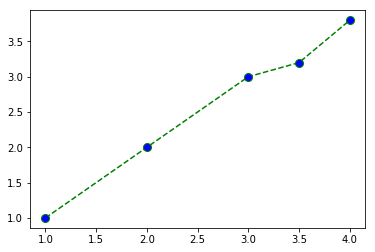

In [5]:
plt.plot([1,2,3,3.5,4.0],[1,2,3,3.2,3.8], 
         color='green', linestyle='dashed', 
         marker='o',markerfacecolor='blue', 
         markersize=8)